In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import PyPizza, FontManager
from scipy import stats
import math

In [2]:
from highlight_text import fig_text

font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

In [3]:
summ_en = pd.read_csv("summaries/summ_en_fwd_17_18.csv")
summ_es = pd.read_csv("summaries/summ_es_fwd_17_18.csv")

In [4]:
def get_stats(player, summ): #function to get player stats and percentiles
    p_stats = summ[summ["shortName"] == player]
    
    stats_cols = p_stats.columns.values[1:-3]
    
    values = [round(p_stats[col].values[0], 2) for col in stats_cols]
    
    means = summ[stats_cols].mean().values
    stds = summ[stats_cols].std().values
    
    values_norm = [(x-m)/s for x, m, s in zip(values, means, stds)]
    
    percentiles = [int(stats.percentileofscore(summ[col].values, p_stats[col].values[0])) for col in stats_cols]
    return values, percentiles, values_norm

In [5]:
summ_en.sort_values("xG")

,playerId,xG,passes,recs,won atk ground duels,won air duels,goals,assists,key_passes,shortName,roleName,MinutesPlayed
67,277002,0.070791,13.715753,16.952055,8.321918,1.695205,0.000000,0.154110,0.462329,F. Diabaté,Forward,584
31,9532,0.106643,6.136364,7.252066,2.417355,1.487603,0.000000,0.185950,0.000000,S. Berahino,Forward,484
44,16122,0.126559,6.793722,9.013453,5.650224,1.412556,0.067265,0.067265,0.336323,E. Kachunga,Forward,1338
45,16436,0.131389,9.819466,11.585557,6.004710,1.200942,0.000000,0.282575,0.282575,C. Quaner,Forward,1274
2,3326,0.133727,5.792079,10.693069,4.900990,0.000000,0.148515,0.148515,0.445545,Jesé Rodríguez,Forward,606
...,...,...,...,...,...,...,...,...,...,...,...,...
26,8953,0.553650,5.330097,9.087379,2.271845,3.145631,0.524272,0.000000,0.087379,C. Austin,Forward,1030
54,26010,0.563734,10.142132,18.822335,2.832487,5.756345,0.639594,0.091371,0.548223,O. Giroud,Forward,985
18,8325,0.584223,11.844512,17.240854,6.859756,0.731707,0.777439,0.274390,0.731707,S. Agüero,Forward,1968
63,145692,0.620999,7.326549,14.819611,5.661425,3.246994,0.666050,0.083256,0.249769,O. Niasse,Forward,1081


### Player Radar

I'll use player radar to view the stats of the player in interest, which is Gabriel Jesus in this case. I'll also use the radars to compare Gabriel Jesus performance with the performance of the similar player.

In [6]:
def make_radar(params, player, base_df, league=""):

    values, percentiles, vals_norm = get_stats(player, base_df)

    baker = PyPizza(
        params=params,                  # list of parameters
        straight_line_color="#000000",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_lw=1,               # linewidth of last circle
        other_circle_lw=1,              # linewidth for other circles
        other_circle_ls="-."            # linestyle for other circles
    )

    fig, ax = baker.make_pizza(
        percentiles,              # list of values
        figsize=(8, 8),      # adjust figsize according to your need
        param_location=110,  # where the parameters will be added
        kwargs_slices=dict(
            facecolor="cornflowerblue", edgecolor="#000000",
            zorder=2, linewidth=1
        ),
        # values to be used when plotting slices
        kwargs_params=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal.prop, va="center"
        ),                   # values to be used when adding parameter
        kwargs_values=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal.prop, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        )                    # values to be used when adding parameter-values
    )

    texts = baker.get_value_texts()
    for i, text in enumerate(texts):
        text.set_text(str(values[i]))

    fig.text(
        0.515, 0.97, player, size=18,
        ha="center", fontproperties=font_bold.prop, color="#000000"
    )

    # add subtitle
    fig.text(
        0.515, 0.942,
        f"Percentile Rank vs {league} Forwards | Season 2017-18",
        size=15,
        ha="center", fontproperties=font_bold.prop, color="#000000"
    )

    plt.show()

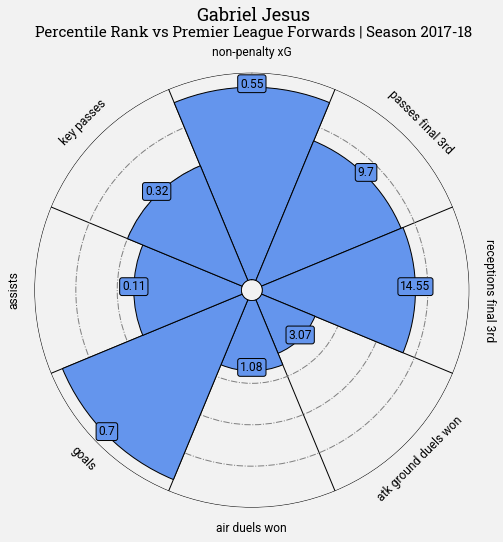

In [7]:
params = ["non-penalty xG", "passes final 3rd", "receptions final 3rd", "atk ground duels won", "air duels won", "goals", "assists", "key passes"]

make_radar(params, "Gabriel Jesus", summ_en, "Premier League")

In [8]:
#cosine of an angle: produto escalar/produto vetorial
def cosine_score(p1, p2):
    upper = 0
    for i in range(len(p1)):
        upper += p1[i]*p2[i]
        
    a = sum([p*p for p in p1])
    b = sum([p*p for p in p2])
    down = math.sqrt(a)*math.sqrt(b)
    
    cos = upper/down
    return cosvalues, percentiles #= get_stats(player, base_df)

In [9]:
#euclidean
def euc_dist_score(player1, player2):
    
    base = sum([(p1 - p2)**2 for (p1, p2) in zip(player1, player2)])
    
    dist = math.sqrt(base)
    
    d_score = 1/(1+dist)
    
    return d_score

In [10]:
vals, percs, vals_norm = get_stats("Gabriel Jesus", summ_en)

In [11]:
vals1, percs1, vals_norm1 = get_stats("Mohamed Salah", summ_en)

In [12]:
euc_dist_score(vals_norm, vals_norm1)

0.2980653063720157

In [13]:
def get_pct(summ_max, summ_min, v):
    return (v-summ_min)/(summ_max - summ_min)

In [14]:
summ_score = summ_es.copy()
summ_score["score"] = summ_es.apply(lambda x: euc_dist_score(get_stats(x.iloc[-3], summ_es)[2], vals_norm), axis=1)

smax = summ_score.score.max()
smin = summ_score.score.min()
summ_score["score_pct"] = summ_score.apply(lambda x: get_pct(smax, smin, x["score"]), axis=1)

In [19]:
summ_pct = summ_score.drop("score", axis=1).copy()

In [32]:
summ_pct.sort_values("score_pct", ascending=False).head(10)[["shortName", "score_pct"]].reset_index(drop=True).style.background_gradient(cmap="BuGn").format({'score_pct': "{:.2%}"})

,shortName,score_pct
0,W. Ben Yedder,100.00%
1,Santi Mina,98.02%
2,Rodrigo,76.01%
3,L. Suárez,71.21%
4,L. Muriel,70.37%
5,Iago Aspas,67.17%
6,C. Bacca,66.44%
7,Loren Morón,61.11%
8,Juanmi,57.47%
9,S. Zaza,56.18%


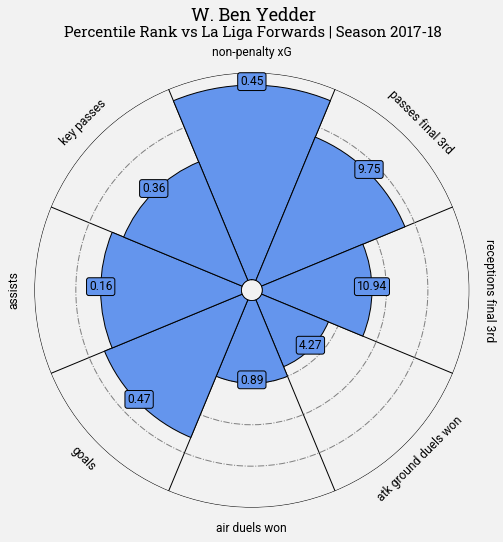

In [16]:
make_radar(params, "W. Ben Yedder", summ_es, "La Liga")

In [17]:
def comp_radar(params, player1, base_df1, player2, base_df2):
    values1, percentiles1, vals_norm1 = get_stats(player1, base_df1)
    values2, percentiles2, vals_norm2 = get_stats(player2, base_df2)
    
    df_comp = base_df1.append(base_df2)
    
    stats_cols = df_comp.columns.values[1:-3]
    
    max_range = [round(max(df_comp[col]),2) for col in stats_cols]
    min_range = [round(min(df_comp[col]), 2) for col in stats_cols]
    
    baker = PyPizza(
        params=params,
        min_range=min_range,        # min range values
        max_range=max_range,        # max range values
        background_color="#222222", straight_line_color="#000000",
        last_circle_color="#000000", last_circle_lw=2.5, other_circle_lw=0,
        other_circle_color="#000000", straight_line_lw=1
    )

    # plot pizza
    fig, ax = baker.make_pizza(
        values1,                     # list of values
        compare_values=values2,    # passing comparison values
        figsize=(8, 8),             # adjust figsize according to your need
        color_blank_space="same",   # use same color to fill blank space
        blank_alpha=0.4,            # alpha for blank-space colors
        param_location=110,         # where the parameters will be added
        kwargs_slices=dict(
            facecolor="#1A78CF", edgecolor="#000000",
            zorder=1, linewidth=1
        ),                          # values to be used when plotting slices
        kwargs_compare=dict(
            facecolor="#ff9300", edgecolor="#222222", zorder=3, linewidth=1,
        ),                          # values to be used when plotting comparison slices
        kwargs_params=dict(
            color="#F2F2F2", fontsize=12, zorder=5,
            fontproperties=font_normal.prop, va="center"
        ),                          # values to be used when adding parameter
        kwargs_values=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal.prop, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="#1A78CF",
                boxstyle="round,pad=0.2", lw=1
            )
        ),                           # values to be used when adding parameter-values
        kwargs_compare_values=dict(
            color="#000000", fontsize=12,
            fontproperties=font_normal.prop, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="#FF9300",
                boxstyle="round,pad=0.2", lw=1
            )
        )                            # values to be used when adding comparison-values
    )

    # add title
    #texts = baker.get_value_texts()
    #for i, text in enumerate(texts):
    #    text.set_text(str(values1[i]))
    
    fig_text(
        0.515, 0.99, f"<{player1}> compared to <{player2}>",
        size=16, fig=fig,
        highlight_textprops=[{"color": '#1A78CF'}, {"color": '#FF9300'}],
        ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
    )
    # add subtitle
    fig.text(
        0.515, 0.942,
        "Season 2017-18",
        size=15,
        ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
    )

    plt.show()

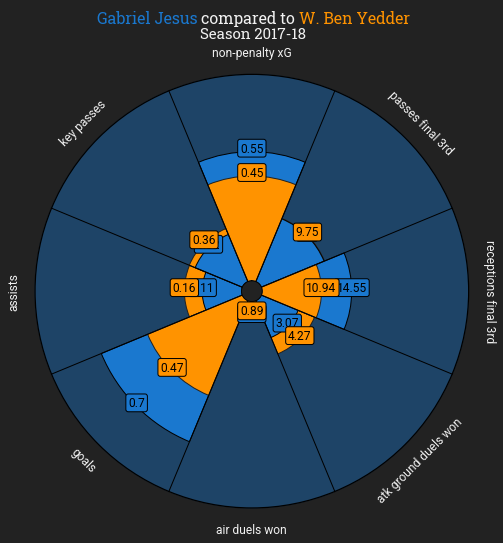

In [18]:
comp_radar(params, "Gabriel Jesus", summ_en, "W. Ben Yedder", summ_es)